In [45]:
%pylab inline
import pandas
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


In [9]:
from sklearn import datasets

In [37]:
digits = datasets.load_digits()

In [38]:
data = digits['data']
images = digits['images']
target = digits['target']

In [12]:
images[0]
images[0].shape

(8L, 8L)

4


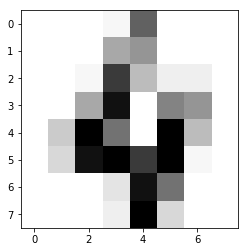

In [13]:
plt.imshow(images[4],cmap="Greys")
print(target[4])

In [14]:
data[4]
data.shape


(1797L, 64L)

In [39]:
x = data
y = target

In [40]:
x.shape

(1797L, 64L)

In [17]:
y.shape

(1797L,)

In [34]:
train_x = x[:-5]
train_y = y[:-5]
test_x = x[-5:]
test_y = y[-5:]

In [18]:
from sklearn import svm


changing gamma and C values .. will drastically improve the precision
----

In [49]:
clf = svm.SVC(C = 10, gamma=.001)

In [50]:
from sklearn.model_selection import train_test_split

x = data
y = target

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.30)

print(x.shape, x_train.shape, x_test.shape)

((1797L, 64L), (1257L, 64L), (540L, 64L))


In [51]:
clf.fit(x_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [62]:

testfile = "dig_test.csv"
poof = []
colnames = []
with open(testfile, 'r') as csvfile1:
    reader1 = csv.DictReader(csvfile1, delimiter=',')
    colnames = reader1.fieldnames
target = pandas.read_csv(testfile , names=colnames, skiprows=1)
cols = target.columns

for col in cols:
    poof.append(target[col].tolist())
        
x_test2= np.array(poof)    

In [63]:
x_test2 = x_test2.transpose()
x_test2.shape

(28000L, 784L)

In [64]:
pca = PCA(n_components=64).fit_transform(x_test2)

In [65]:
pca.shape

(28000L, 64L)

In [61]:
match = 0
for i in range(len(x_test)):
    a = clf.predict([x_test[i]])[0]
#     print(a,y_test[i])
    if(a == y_test[i]):
        match += 1
print(float(match)/len(x_test))  


    

0.994444444444


In [84]:
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB()
clf2.fit(x_train,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [66]:
from sklearn import metrics
y_pred = clf.predict(pca)
# print(metrics.confusion_matrix(y_pred,y_test))


In [67]:
file = open("kag_digit2.txt","w")
index = 0
for ii in range(len(y_pred)):    
    index += 1
    st = str(index) + " , " + str(y_pred[ii]) + "\n"
    file.write(st)

In [106]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        57
           4       1.00      1.00      1.00        56
           5       0.95      1.00      0.98        63
           6       1.00      0.98      0.99        51
           7       1.00      1.00      1.00        53
           8       0.98      0.98      0.98        47
           9       0.98      0.96      0.97        67

   micro avg       0.99      0.99      0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



pickle the model and reuse it later .. can be shared with others
--------
Library for serialization , within scikit - joblib


In [111]:
from sklearn.externals import joblib
filename = "model1.sav"
joblib.dump(clf, filename)

['model1.sav']

'head' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import csv
datafile = "train.csv"
pix0 = []
with open(datafile, 'rU') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    
    # skip the first line
    
    for row in reader:
        pix0.append(row[0])

KeyError: 0